In [20]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Load the dataset from local CSV file
df = pd.read_csv('german_credit_data.csv')

# Preprocessing: Convert categorical columns to numeric using LabelEncoder
le = LabelEncoder()

# Apply LabelEncoder to other categorical columns
df['Sex'] = le.fit_transform(df['Sex'].astype(str))  # Male/Female to 0/1
df['Housing'] = le.fit_transform(df['Housing'].astype(str))  # Own/Rent/Free to 0/1/2
df['Purpose'] = le.fit_transform(df['Purpose'].astype(str))  # Purpose categories to numeric values

# Handle 'Saving accounts' manually since it contains non-numeric values
saving_accounts_map = {
    'little': 0,
    'moderate': 1,
    'quite rich': 2,
    'rich': 3
}
df['Saving accounts'] = df['Saving accounts'].map(saving_accounts_map)

# Handle 'Checking account' manually (if needed) as it contains numeric or NaN values
checking_accounts_map = {
    'little': 0,
    'moderate': 1,
    'rich': 2
}
df['Checking account'] = df['Checking account'].map(checking_accounts_map)

# Handle missing values in 'Checking account' column (if any)
df['Checking account'].fillna(df['Checking account'].mean(), inplace=True)

# Create pseudo-labels for good and bad credit based on custom rules
def assign_credit_risk(row):
    # Rule for bad credit risk (0)
    if row['Credit amount'] > 3000 and row['Duration'] > 12 and row['Saving accounts'] <= 1:
        return 0  # bad credit
    # Rule for good credit risk (1)
    elif row['Credit amount'] <= 3000 and row['Duration'] <= 12 and row['Saving accounts'] >= 2:
        return 1  # good credit
    else:
        return 1  # default to good credit for cases not covered explicitly

# Apply the rule to create the 'Credit risk' column
df['Credit risk'] = df.apply(assign_credit_risk, axis=1)

# Features and target
X = df.drop(columns=['Credit risk', 'Unnamed: 0'])  # Drop the target and index columns
y = df['Credit risk']

# Check for NaN values in features (X) and handle them
if X.isnull().any().any():
    X.fillna(X.mean(), inplace=True)  # Fill NaN values with column mean

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train the model using Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.995

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99        41
           1       0.99      1.00      1.00       159

    accuracy                           0.99       200
   macro avg       1.00      0.99      0.99       200
weighted avg       1.00      0.99      0.99       200



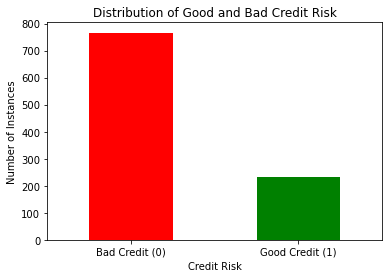

In [21]:
import matplotlib.pyplot as plt

# Count the occurrences of each class (good and bad credit risk)
credit_risk_counts = df['Credit risk'].value_counts()

# Plot the bar chart
plt.figure(figsize=(6, 4))
credit_risk_counts.plot(kind='bar', color=['red', 'green'])

# Add title and labels
plt.title('Distribution of Good and Bad Credit Risk')
plt.xlabel('Credit Risk')
plt.ylabel('Number of Instances')
plt.xticks([0, 1], ['Bad Credit (0)', 'Good Credit (1)'], rotation=0)

# Show the plot
plt.show()
